<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_InsertionSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe InsertionSort**

## **1. Problema: Ordenamiento de una secuencia de números**
Se refiere a problemas que requieran una ordenación de sus elementos. Para resolverlos se aplica un algoritmo de ordenamiento sobre el conjunto de $n$ elementos.
#### **Entrada:** Arreglo con $n$  números $[a_1,a_2,...,a_n]$
#### **Solución:** Ordenamiento de la secuencia $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Los problemas de ordenamiento son considerados muchas veces introductorios al análisis de algoritmos en computación, esto debido a la simpleza de los planteamientos para resolverlos, además de la gran variedad de algoritmos existentes, que funcionan como ejemplo de estudio para los conceptos de notación Big-O y Paradigmas de Diseño.



## **2. InsertionSort**


### **2.1. Descripción del algoritmo**
El InsertionSort es un algoritmo que funciona de manera muy similar a cuando ordenamos una ***mano de cartas***. Siguiendo el ejemplo anterior debemos partir suponiendo que la mano izquierda con cartas ya se encuentre ordenada, esto es siempre verdadero en caso de que existe solo **una** carta en este conjunto. Cuando tomamos una nueva carta con la derecha, lo que hacemos es compararla con cada carta anterior de la otra mano ya ordenada, teniendo como resultado que las cartas mayores se muevan un espacio a la derecha para ubicar la menor en el sitio que le corresponda. Luego de ubicarla, observaremos que nuestra mano izquierda, justo momentos antes de sacar una nueva carta, **esta se encuentra ordenada.**

### **Como se observa en la siguiente representación:**

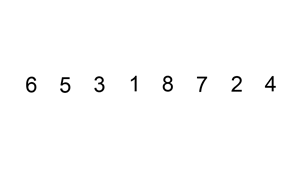

El siguiente código implementa el algoritmo del InsertionSort.
Recibirá como entrada un arreglo de $n$ elementos que serán ordenados dentro del mismo.
1.   En cada iteración se obtendrá una **key** que será el elemento $a[ i ]$, donde i comenzará en $1$ hasta $n-1$ (Se considera que el sub-conjunto de un solo elemento $a[ 0 ]$ se encuentra ordenado).
2.   La **key** se compara con cada elemento $a[ k ]$ donde $k$ comenzará siendo igual a $i-1$ hasta $0$ (Todo elemento anterior a **key**).
3.   Si el elemento $a[ k ]$ es menor a **key** se le asigna la **key** a $a[ k+1 ]$, ya que es la posición en la que pertenece. Si no es verdad, se copiará el elemento $a[ k ]$ en $[ k+1 ]$ (Simula que el elemento se mueve un espacio a la derecha) y se repetirá este paso con $k$ igual a $k-1$.
4.   Al finalizar el algoritmo se retornará el arreglo ordenado y un contador de comparaciones.
También se puede pasar como parámetro un booleano **True** a la función, conocido como **Verbose = True**, para visualizar el paso a paso.



### **2.2. Ejemplo**
Considerando el arreglo:

$a=[4,3,5,1]$ 

En la primera iteración se asignará el 3 como **key**:

$a=[4,3,5,1]$ $key = 3$ 

Se compará la **key** con el anterior.

**key** es menor que 4, entonces el 4 se copia a la derecha:

$a=[4,4,5,1]$

Y la **key** se asigna al primer elemento.

$a=[3,4,5,1]$

En la segunda iteración se asignará el 5 como **key**:

$a=[3,4,5,1]$ $key = 5$

Se compará la **key** con el anterior.

**key** es mayor que 4, entonces la **key** se copia a la derecha:

$a=[3,4,5,1]$

En la tercera iteración se asignará el 1 como **key**:

$a=[3,4,5,1]$ $key = 1$

Se compará la **key** con el anterior.

**key** es menor que 5, entonces el 5 se copia a la derecha:

$a=[3,4,5,5]$

Se compará la **key** con el anterior.

**key** es menor que 4, entonces el 4 se copia a la derecha:

$a=[3,4,4,5]$

Se compará la **key** con el anterior.

**key** es menor que 3, entonces el 3 se copia a la derecha:

$a=[3,3,4,5]$

Y la **key** se asigna al primer elemento.

$a=[1,3,4,5]$

Y ya tenemos el arreglo ordenado.


### **2.3. Implementación del algoritmo**

In [2]:
import random
from termcolor import colored
import copy

def insertion_sort(a, verbose = False):
    n = len(a)
    T = 0 #contador de comparaciones
    if verbose:
      print("Antes de comenzar")
      print(colored(f"{str(a[:1])[1:-1]}", "green"), ",", str(a[1:])[1:-1])

    for i in range(1,n): #Comienzo de cada iteración de i, bucle mayor
      key = a[i]
      if verbose:
        print("\nIteración",i)
        if i == n-1:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), end= '')
        else:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), ",", str(a[i+1:])[1:-1], end= '')
        print("   key:", colored(f"{key}", "red"))
        print("Comparaciones")

      for k in range(i-1,-1,-1):#Inicio de las comparaciones
        T += 1
        if a[k] < key: #Si es verdad
          a[k+1] = key    #key toma el lugar que le corresponde, a la derecha del elemento actual
          if verbose:
            print(str(a[:k+1])[1:-1], ",", colored(f"{str(a[k+1:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", colored(f"{key}", "blue"))

          break           #En este caso se rompe este ciclo para ubicar otro key

        a[k+1] = a[k]  #Si es falso, el elemento de la mano ordenada se "mueve a la derecha"(se copia)
        if verbose:
          if k == 0:
            print(colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)
          else:
            print(str(a[:k])[1:-1], ",", colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)

      if key < a[0]:   
        T += 1         #Si se movieron a la derecha todos los elementos porque key era el más pequeño
        a[0] = key     #Entonces se concluye este ciclo colocándo a la key en la primer posición

        if verbose:
            print(colored(f"{str(a[0:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1], "   key:", colored(f"{key}", "blue"))
      if verbose:
        print("Al finalizar iteración")
        if i != n-1:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"), ",", str(a[i+1:])[1:-1])
        else:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"))

    if verbose:
      print("\nArreglo ordenado!")
      print(str(a[:]))
    return a, T

# Ejemplo
A = [5,8,7,1,3]
print("Entrada: ",A)
A, counter = insertion_sort(A)
print("Salida: ",A)
print("# comparaciones: ", counter)


Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  11


### **2.4. Ejecución paso a paso (Verbose = True)**

In [3]:
import random
a = random.sample(range(1, 100), 6)
a,c= insertion_sort(a,verbose=True)
print("# comparaciones: ", c)

Antes de comenzar
99 , 85, 12, 52, 25, 1

Iteración 1
99 , 85 , 12, 52, 25, 1   key: 85
Comparaciones
99, 99 , 12, 52, 25, 1    key: 85
85 , 99, 12, 52, 25, 1    key: 85
Al finalizar iteración
85, 99 , 12, 52, 25, 1

Iteración 2
85, 99 , 12 , 52, 25, 1   key: 12
Comparaciones
85 , 99, 99 , 52, 25, 1    key: 12
85, 85 , 99, 52, 25, 1    key: 12
12 , 85, 99, 52, 25, 1    key: 12
Al finalizar iteración
12, 85, 99 , 52, 25, 1

Iteración 3
12, 85, 99 , 52 , 25, 1   key: 52
Comparaciones
12, 85 , 99, 99 , 25, 1    key: 52
12 , 85, 85 , 99, 25, 1    key: 52
12 , 52 , 85, 99, 25, 1    key: 52
Al finalizar iteración
12, 52, 85, 99 , 25, 1

Iteración 4
12, 52, 85, 99 , 25 , 1   key: 25
Comparaciones
12, 52, 85 , 99, 99 , 1    key: 25
12, 52 , 85, 85 , 99, 1    key: 25
12 , 52, 52 , 85, 99, 1    key: 25
12 , 25 , 52, 85, 99, 1    key: 25
Al finalizar iteración
12, 25, 52, 85, 99 , 1

Iteración 5
12, 25, 52, 85, 99 , 1   key: 1
Comparaciones
12, 25, 52, 85 , 99, 99 ,     key: 1
12, 25, 52 , 85, 85

En cada iteración se asigna una key, visualizada de color rojo.

Cada comparación se observa con un color azul, hay dos tipos, cuando el elemento se copia a la derecha o cuando la llave reemplaza al elemento.

Se visualiza con color verde el sub-conjunto de elementos ordenados.

## **3. Tiempo de ejecución**
#### **Teorema (Tiempo de ejecución)**.
 *El algoritmo **InsertionSort** tiene un tiempo de ejecución de  $O(n^2)$  en el **peor caso**.* 
### **Prueba del Teorema**
El peor caso ocurre cuando los elementos del arreglo se encuentran en orden descendente, debido a que en cada iteración el elemento $key$ debe recorrer todo el sub-conjunto que le antecede para ubicarse en la primera posición del arreglo.
### **Ejemplo**

In [18]:
a = [5,4,3,2,1,0,-1]
var_void,c= insertion_sort(a,verbose=True)
print("# comparaciones: ", c)

Antes de comenzar
5 , 4, 3, 2, 1, 0, -1

Iteración 1
5 , 4 , 3, 2, 1, 0, -1   key: 4
Comparaciones
5, 5 , 3, 2, 1, 0, -1    key: 4
4 , 5, 3, 2, 1, 0, -1    key: 4
Al finalizar iteración
4, 5 , 3, 2, 1, 0, -1

Iteración 2
4, 5 , 3 , 2, 1, 0, -1   key: 3
Comparaciones
4 , 5, 5 , 2, 1, 0, -1    key: 3
4, 4 , 5, 2, 1, 0, -1    key: 3
3 , 4, 5, 2, 1, 0, -1    key: 3
Al finalizar iteración
3, 4, 5 , 2, 1, 0, -1

Iteración 3
3, 4, 5 , 2 , 1, 0, -1   key: 2
Comparaciones
3, 4 , 5, 5 , 1, 0, -1    key: 2
3 , 4, 4 , 5, 1, 0, -1    key: 2
3, 3 , 4, 5, 1, 0, -1    key: 2
2 , 3, 4, 5, 1, 0, -1    key: 2
Al finalizar iteración
2, 3, 4, 5 , 1, 0, -1

Iteración 4
2, 3, 4, 5 , 1 , 0, -1   key: 1
Comparaciones
2, 3, 4 , 5, 5 , 0, -1    key: 1
2, 3 , 4, 4 , 5, 0, -1    key: 1
2 , 3, 3 , 4, 5, 0, -1    key: 1
2, 2 , 3, 4, 5, 0, -1    key: 1
1 , 2, 3, 4, 5, 0, -1    key: 1
Al finalizar iteración
1, 2, 3, 4, 5 , 0, -1

Iteración 5
1, 2, 3, 4, 5 , 0 , -1   key: 0
Comparaciones
1, 2, 3, 4 , 5, 5 , -1    key: 

Como podemos observar existe una relación entre el número de iteración actual y las comparaciones realizadas en tal iteración. En la $i-ésima$ iteración se realizan una cantidad de $i+1$ comparaciones para el peor caso.

Para contabilizar la cantidad de comparaciones, deben sumarse el total de comparaciones de cada iteración $i$, donde $i$ comienza en $1$ hasta $n-1$, con $n$ igual a la cantidad de elementos.

>$\sum\limits_{i=1}^{n-1} i+1=\frac{n(n-1)}{2}+n-1$ 

**El tiempo de ejecución en el peor caso es** $O(n^2)$

## **4. Correctitud**
#### **Teorema (Correctitud)**.
*El algoritmo **InsertionSort** genera un arreglo:  $[a′_1,a′_2,...,a′_n]$ , con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,  $a′_1≤a′_2≤...≤a′_n$ .*
### **Prueba del Teorema**
Como se observó en el paso a paso de la implementación del algoritmo InsertionSort, antes de iniciar cada bucle grande, la cantidad de elementos ordenados al comienzo del arreglo es igual al número de la iteración actual. Y al finalizar la iteración **aumenta en uno el sub-conjunto de elementos ordenados**, desde el arreglo posición 0 hasta la posición de la iteración.

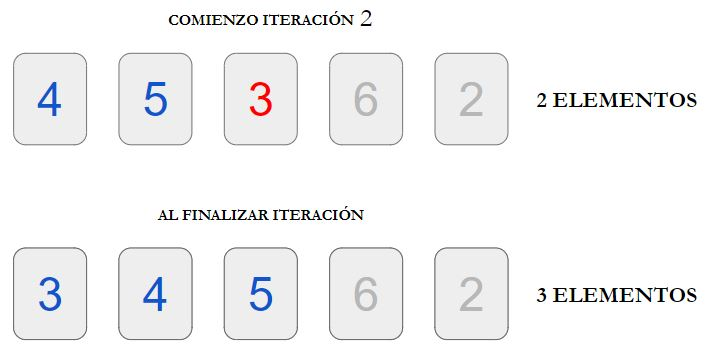

A continuación se comprobará la **propiedad invariante de bucle:**
>Al inicio de cada iteración $i$ del bucle mayor, los elementos del $sub-conjunto$ del $arreglo$, desde la posición $0$ hasta la posición $i-1$, se encuentran ordenados de menor a mayor. Al finalizar la iteración $i$, la cantidad de elementos ordenados del $sub-conjunto$ aumenta en uno, desde la posición $0$ hasta $i$, sin modificar los elementos originales del $arreglo$.
#### **Inicialización**
Al inicio de la primera iteración $i = 1$, el $sub-conjunto$ ordenado de elementos desde la posición $0$ a $i - 1 = 0$, contendrá solo al $a_0$, un único elemento que empíricamente siempre **estará ordenado**. Durante la iteración el elemento en posición $i = 1$ se comparará con el que se encuentra en posición $k = i - 1 = 0$, obteniendo que si el elemento $a_k$ es mayor que $a_i$, entonces estos se intercambiarán de posiciones, pero si es falso ambos se mantendrán en la misma posición. *Nótese que en cualquiera de los dos casos el $sub-conjunto$ al finalizar la iteración seguirá ordenado con estos 2 elementos, cumpliendo así la propiedad.*
#### **Mantención**
se empieza asumiendo que antes de comenzar cualquier iteración $i$, los elementos de las posiciones del $0$ al $i-1$ se encuentran ordenados, **esto es siempre verdad** si al finalizar la iteración este $sub-conjunto$ se mantiene ordenado, lo que comprobaremos a continuación.

En el transcurso de la iteración actual $i$, a una variable $key$ se le asignará el valor del elemento $a_i$, que será el objeto de comparación hasta que termine la iteración.

$key$ se compara con cada elemento del $sub-conjunto$ ordenado, empezando por las posiciones $i-1$ hasta $0$, si un elemento en este conjunto es mayor a $key$ tal valor se copia una posición a la derecha, si es menor a $key$ será indicativo de que no es necesario hacer más comparaciones puesto que $key$ debe quedar una posición a la derecha del elemento con el que se comparó. *Nótese que si en la iteración, todo elemento del $sub-conjunto$ fué mayor a $key$, entonces se habrán desplazado a una posición siguiente y se asigna a $a_0$ el valor de $key$, ya que es el menor valor entre todo este $sub-conjunto$.

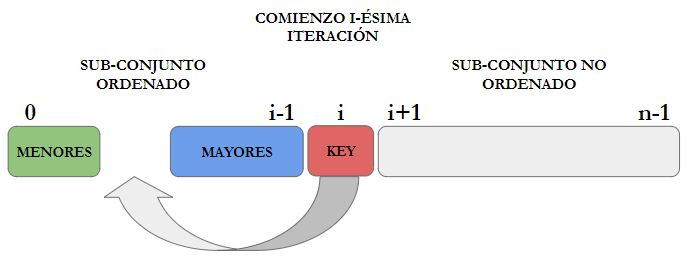

Al término de la $i-ésima$ iteración se seguirá cumpliendo la **propiedad del bucle invariante**.

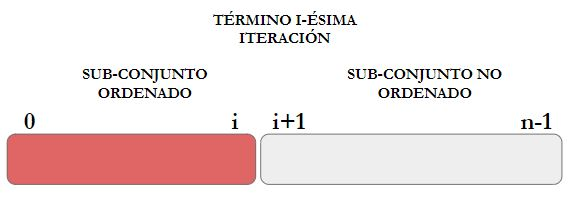

#### **Correctitud**
Como la propiedad resulta verdadera, en cada iteración $i$ se añade y ordena un nuevo elemento del $arreglo$ en este $sub-conjunto$, obteniendo al finalizar la iteración $i = n-1$ una permutación de todos los elementos del $arreglo$ en el $sub-conjunto$, ordenados de menor a mayor.

## **5. Experimentos**

### **5.1. Número de comparaciones entre el mejor y peor caso**

#### **Demostración experimental del mejor caso:**

In [4]:
#Mejor caso
var_void,c= insertion_sort(list(range(0, 5)),verbose=True)

Antes de comenzar
0 , 1, 2, 3, 4

Iteración 1
0 , 1 , 2, 3, 4   key: 1
Comparaciones
0 , 1 , 2, 3, 4    key: 1
Al finalizar iteración
0, 1 , 2, 3, 4

Iteración 2
0, 1 , 2 , 3, 4   key: 2
Comparaciones
0, 1 , 2 , 3, 4    key: 2
Al finalizar iteración
0, 1, 2 , 3, 4

Iteración 3
0, 1, 2 , 3 , 4   key: 3
Comparaciones
0, 1, 2 , 3 , 4    key: 3
Al finalizar iteración
0, 1, 2, 3 , 4

Iteración 4
0, 1, 2, 3 , 4   key: 4
Comparaciones
0, 1, 2, 3 , 4 ,     key: 4
Al finalizar iteración
0, 1, 2, 3, 4

Arreglo ordenado!
[0, 1, 2, 3, 4]


#### **Demostración experimental del peor caso**

In [5]:
#Peor caso
var_void,c= insertion_sort(list(range(5 - 1, -1,-1)),verbose=True)

Antes de comenzar
4 , 3, 2, 1, 0

Iteración 1
4 , 3 , 2, 1, 0   key: 3
Comparaciones
4, 4 , 2, 1, 0    key: 3
3 , 4, 2, 1, 0    key: 3
Al finalizar iteración
3, 4 , 2, 1, 0

Iteración 2
3, 4 , 2 , 1, 0   key: 2
Comparaciones
3 , 4, 4 , 1, 0    key: 2
3, 3 , 4, 1, 0    key: 2
2 , 3, 4, 1, 0    key: 2
Al finalizar iteración
2, 3, 4 , 1, 0

Iteración 3
2, 3, 4 , 1 , 0   key: 1
Comparaciones
2, 3 , 4, 4 , 0    key: 1
2 , 3, 3 , 4, 0    key: 1
2, 2 , 3, 4, 0    key: 1
1 , 2, 3, 4, 0    key: 1
Al finalizar iteración
1, 2, 3, 4 , 0

Iteración 4
1, 2, 3, 4 , 0   key: 0
Comparaciones
1, 2, 3 , 4, 4 ,     key: 0
1, 2 , 3, 3 , 4    key: 0
1 , 2, 2 , 3, 4    key: 0
1, 1 , 2, 3, 4    key: 0
0 , 1, 2, 3, 4    key: 0
Al finalizar iteración
0, 1, 2, 3, 4

Arreglo ordenado!
[0, 1, 2, 3, 4]


#### **Gráfica entre comparaciones**

*   Cantidad de comparaciones del peor caso, realizadas experimentalmente.
*   Cantidad de comparaciones del mejor caso, realizadas experimentalmente.
*   Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.

Para tamaños de problemas con $n ∈ [5,99]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.


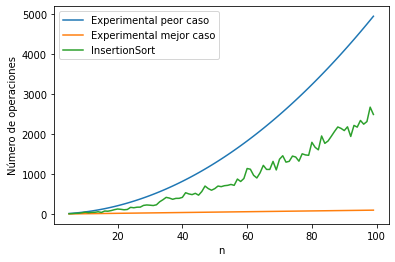

In [8]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)]
y_worst = []
y_best = []
y_insort = []

for n in range(5,100):
  var_void,c= insertion_sort(list(range(0, n))) #rango de menor a mayor con n elementos
  y_best.append(c)

  var_void,c= insertion_sort(list(range(n-1, -1, -1))) #rango de mayor a menor con n elementos
  y_worst.append(c)

  a = random.sample(range(1, 100), n) # n elementos con valores aleatorios
  a,counter = insertion_sort(a)
  y_insort.append(counter)


plt.plot(x,y_worst)
plt.plot(x,y_best)
plt.plot(x,y_insort)
plt.legend(["Experimental peor caso", "Experimental mejor caso", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()


#### **Análisis de resultados**
En el gráfico se aprecia como para arreglos generados aleatoriamente, estos siempre se encuentra bajo la cota superior de $O(n^2)$ y sobre la cota asintótica inferior $Ω(n)$, como era de esperarse, que representan el peor y mejor caso respectivamente.

Para los resultados experimentales, no se observa ninguna tendencia clara hacia alguna cota asintótica, lo que podría indicar, que en comparación con las funciones donde se encuentra acotado el algoritmo, este es balanceado con sus comparaciones.

### **5.2. Paso a paso en arreglo parcialmente ordenado**

Se ejecutará el algoritmo en una secuencia de números, donde solo un elemento se encuentre desplazado de su posición lógica de menor a mayor.

In [7]:
a = [2,4,5,3,6,7]
a,c= insertion_sort(a,verbose=True)
print("# comparaciones: ", c)

Antes de comenzar
2 , 4, 5, 3, 6, 7

Iteración 1
2 , 4 , 5, 3, 6, 7   key: 4
Comparaciones
2 , 4 , 5, 3, 6, 7    key: 4
Al finalizar iteración
2, 4 , 5, 3, 6, 7

Iteración 2
2, 4 , 5 , 3, 6, 7   key: 5
Comparaciones
2, 4 , 5 , 3, 6, 7    key: 5
Al finalizar iteración
2, 4, 5 , 3, 6, 7

Iteración 3
2, 4, 5 , 3 , 6, 7   key: 3
Comparaciones
2, 4 , 5, 5 , 6, 7    key: 3
2 , 4, 4 , 5, 6, 7    key: 3
2 , 3 , 4, 5, 6, 7    key: 3
Al finalizar iteración
2, 3, 4, 5 , 6, 7

Iteración 4
2, 3, 4, 5 , 6 , 7   key: 6
Comparaciones
2, 3, 4, 5 , 6 , 7    key: 6
Al finalizar iteración
2, 3, 4, 5, 6 , 7

Iteración 5
2, 3, 4, 5, 6 , 7   key: 7
Comparaciones
2, 3, 4, 5, 6 , 7 ,     key: 7
Al finalizar iteración
2, 3, 4, 5, 6, 7

Arreglo ordenado!
[2, 3, 4, 5, 6, 7]
# comparaciones:  7


#### **Análisis de resultados**
Llamaremos **anomalía** cuando ocurre más de una comparación por iteración.

Como se observa en el paso a paso, que en la mayoría de las iteraciones no ocurren anomalías, esto debido a que la $key$ de esa iteración cumple una **relación de orden lógico** (menor a mayor) con todos los elementos que la anteceden.

Por lo tanto solo en las iteraciones donde **no se cumple ese orden**, como en la tercera, **ocurrirán anomalías**.

### **5.3. Comparación del tiempo de ejecución entre InsertionSort y BubbleSort**

#### **Implementación BubbleSort**

In [11]:
def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T

#### **Comparación:**
En el siguiente gráfico se compara el tiempo de ejecución del algoritmo **InsertionSort** con el **BubbleSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre  5  y  499.

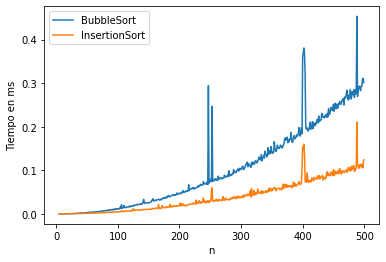

In [12]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_bubble = []
y_insertion = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t_bubble = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo b y retorna el mejor tiepo obtenido.
  t_insertion = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({b})", repeat=1, number=10)

  x.append(n)
  y_bubble.append(t_bubble)
  y_insertion.append(t_insertion)


plt.plot(x,y_bubble)
plt.plot(x,y_insertion)
plt.legend(["BubbleSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**
Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente, el algoritmo BubbleSort, en función del tamaño del problema, aumenta en mayor proporción el tiempo en ejecución que el algoritmo InsertionSort. Lo que indica que con una mayor cantidad de elementos se vuelve más óptima la utilización del algoritmo InsertionSort.

También se observan peaks en el tiempo de ejecución, que pueden deberse a otros procedimientos que ocupan recursos del procesador o comportamientos irregulares del mismo.

Los resultados pueden deberse a la cantidad de comparaciones que realiza BubbleSort como se vera a continuación:

*(Rescatado de Informe BubbleSort).*

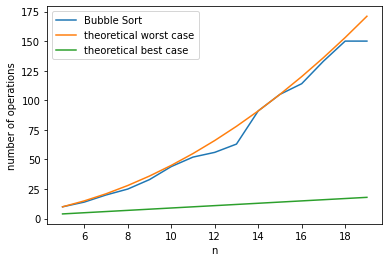

In [15]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y1=[n*(n-1)/2 for n in range(5,20)] # worst case
y2=[n-1 for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  a,counter = bubble_sort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bubble Sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

La cantidad de comparaciones es más cercana al peor caso con complejidad temporal $O(n^2)$, como se demuestra en los tiempos de ejecución.